## New Zealand Covid-19 and death rate from 2020 till now(2022)

### Group Project


In [1]:
library(visdat)
library(tidyverse)
library(readxl)
library(dplyr)
library(tidytext)
library(textdata)
library(rvest) # to scrape data from websites
library(xml2) # to effctively work with HTML or XML in R
library(magrittr) 
library(purrr)
library(glue) 
library(stringr) 
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [2]:
options(repr.plot.width=15, repr.plot.height=8)

> We'll read the data straight from the ministry of Health git repository, that way if the data is updated, we'll get the latest dataset for covid cases from 2020 till todate.

In [14]:
test_case_data <- read_xlsx('covid-cases-counts-location.xlsx')
colnames(test_case_data)[1] <- "date"
test_case_data$date <- as.Date(test_case_data$date)
test_case_data1 <- test_case_data %>% 
        mutate(week = cut.Date(date, breaks = "1 week", labels = FALSE)) %>% 
        arrange(date) %>%
        group_by(week) %>%
        summarise(WeeklyCases = sum(Cases), Week = max(date)) %>%
        select(Week, WeeklyCases)
test_case_data1 %<>% na.omit()
colnames(test_case_data1)[1] <- "weekly_date"
colnames(test_case_data1)[2] <- "weekly_total_cases"
test_case_data1

weekly_date,weekly_total_cases
<date>,<dbl>
2020-03-01,1
2020-03-08,6
2020-03-15,4
2020-03-22,121
2020-03-29,483
2020-04-05,506
2020-04-12,234
2020-04-19,87
2020-04-26,34


In [15]:
death_data = read_csv("https://raw.githubusercontent.com/minhealthnz/nz-covid-data/main/cases/weekly-deaths.csv")

Rows: 137 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): Deaths within 28 days of being reported as case, Deaths attributab...
date (1): Week ending

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [22]:
colnames(death_data)[1] <- "weekly_date"
colnames(death_data)[2] <- "death_in_28_days"
colnames(death_data)[3] <- "death_attributable"
total_death_test_table <- merge(death_data, test_case_data1, by="weekly_date")
total_death_test_table

weekly_date,death_in_28_days,death_attributable,weekly_total_cases
<date>,<dbl>,<dbl>,<dbl>
2020-03-01,0,0,1
2020-03-08,0,0,6
2020-03-15,0,0,4
2020-03-22,0,0,121
2020-03-29,1,1,483
2020-04-05,0,0,506
2020-04-12,4,4,234
2020-04-19,7,7,87
2020-04-26,7,7,34


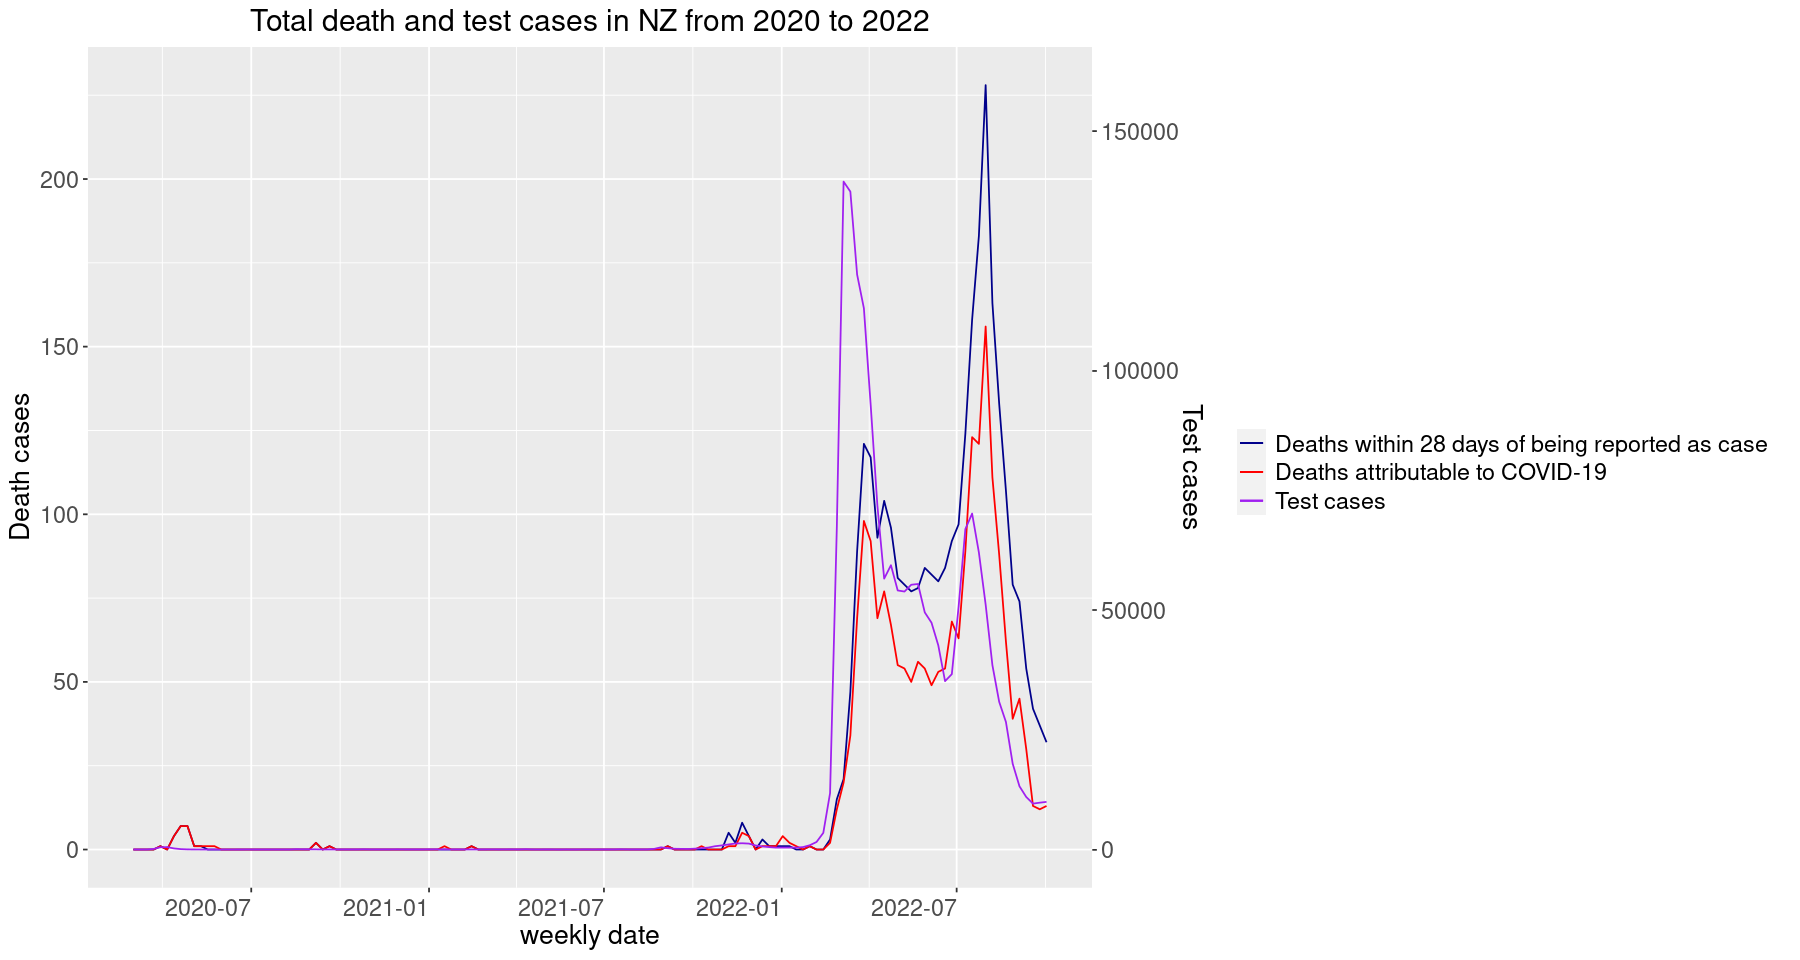

In [41]:
total_death_test_graph <- total_death_test_table %>% 
        ggplot(aes(x=weekly_date)) + 
        ggtitle('Total death and test cases in NZ from 2020 to 2022') + 
        geom_line(aes(y=death_in_28_days, color="Deaths within 28 days of being reported as case"), position = position_dodge(0.2)) +
        geom_line(aes(y=death_attributable, color="Deaths attributable to COVID-19"), position = position_dodge(0.2)) +
        geom_line(aes(y=weekly_total_cases/700, color="Test cases"), position = position_dodge(0.2)) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=16), 
              axis.text.x = element_text(vjust = 0.5, hjust = 1, size=14),
              axis.text.y = element_text(size=14),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        scale_y_continuous(
                name = "Death cases",
                sec.axis = sec_axis(~.*700, name="Test cases")) + 
        scale_color_manual(name = "Data types", values = c("Deaths within 28 days of being reported as case" = "darkblue", "Deaths attributable to COVID-19" = "red", "Test cases" = "purple")) + 
        xlab("weekly date")
total_death_test_graph